In [1]:
import os

In [2]:
os.listdir("/Users/acqmallatief/Project/Project SIB/HiSIGNApp/Dataset/BisIndo")

['lihat',
 'kangen',
 'benci',
 'ada',
 'sama-sama',
 'rumah',
 'malam',
 'keadaan',
 'cinta',
 'baik',
 '.DS_Store',
 'maaf',
 'sayang',
 'bercanda',
 'marah',
 'jalan-jalan',
 'sabar',
 'jangan',
 'salah',
 'malu',
 'keren',
 'kamu',
 'halo',
 'kakak',
 'malas',
 'kapan',
 'ayah',
 'pagi',
 'ini',
 'aku',
 'bantu',
 'minum',
 'apa',
 'dia',
 'minta',
 'jam',
 'main',
 'kenapa',
 'ingin',
 'kerja',
 'sakit']

In [3]:
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input

In [4]:
#sample img
adaImg = image.load_img("Dataset/BisIndo/ada/ada_1.jpg")
akuImg = image.load_img("Dataset/BisIndo/aku/aku_1.jpg")
apaImg = image.load_img("Dataset/BisIndo/apa/apa_1.jpg")
ayahImg = image.load_img("Dataset/BisIndo/ayah/ayah_1.jpg")

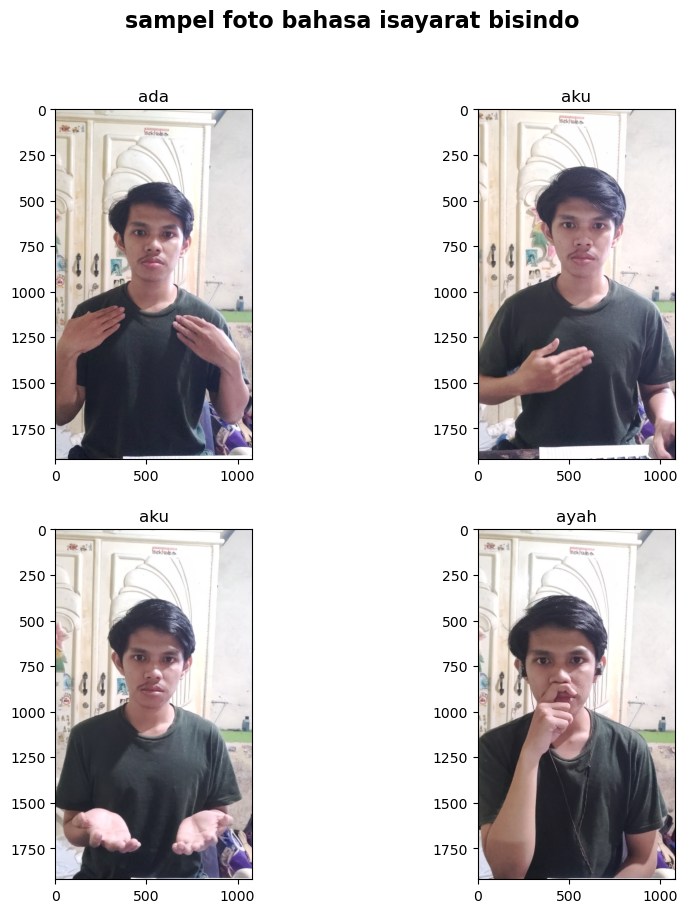

In [5]:
#visualisai sample img
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(ncols=2,
                                             nrows=2,
                                             figsize=(10, 10))
#ax0 sample ada
ax0.imshow(adaImg)
ax0.set(title="ada")

#ax1 sample aku
ax1.imshow(akuImg)
ax1.set(title="aku")

#ax2 sample apa
ax2.imshow(apaImg)
ax2.set(title="aku")

#ax3 sample ayah
ax3.imshow(ayahImg)
ax3.set(title="ayah")

fig.suptitle("sampel foto bahasa isayarat bisindo", fontsize=16, fontweight="bold")
plt.show()

In [6]:
fig.savefig("sample_img.png")

In [ ]:
train_dir = os.path.join("Dataset/BisIndo/")
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   validation_split=0.1) # set validation

In [ ]:
# train data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode="categorical",
    subset="training"
) # set as training data

# validation data
validation_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150),
    batch_size=16,
    class_mode="categorical",
    subset="validation"
)

Found 6180 images belonging to 40 classes.
Found 681 images belonging to 40 classes.


In [ ]:
# Model transfer Learning by VGG16
from tensorflow.keras.applications import VGG16

model = tf.keras.models.Sequential([
    VGG16(weights="imagenet", include_top=False,
          input_tensor=Input(shape=(150, 150, 3))),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8192, activation="relu"),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(4095, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(40, activation="softmax")
])

2022-12-15 16:50:45.954202: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-15 16:50:45.955000: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

58889256/58889256 [==============================] - 14s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 8192)              67117056  
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 4095)              33550335  
                                                                 
 dropout_1 (Dropout)         (None, 4095)              0         
                                                                 
 dense_2 (Dense)             (None, 40)                1

In [ ]:
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint("Weights/weights.{epoch:02d}-{val_loss:.2f}.hdf5",
                                             monitor='val_loss', 
                                             verbose=0, save_best_only=False,
                                             save_weights_only=False, 
                                             mode='auto', 
                                             period=1)

In [ ]:
model.fit(train_generator,
                      validation_data=validation_generator,
                      epochs=15,
                      verbose=1,
                      shuffle=True,
                      callbacks=[checkpoint])

Epoch 1/15


2022-12-15 16:51:37.713147: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-15 16:51:38.128233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


773/773 [==============================] - ETA: 0s - loss: 1.1920 - accuracy: 0.7032

2022-12-15 16:55:04.992274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


773/773 [==============================] - 215s 272ms/step - loss: 1.1920 - accuracy: 0.7032 - val_loss: 0.2069 - val_accuracy: 1.0000
Epoch 2/15
773/773 [==============================] - 206s 267ms/step - loss: 0.0237 - accuracy: 0.9940 - val_loss: 0.1745 - val_accuracy: 1.0000
Epoch 3/15
773/773 [==============================] - 204s 264ms/step - loss: 0.0045 - accuracy: 0.9994 - val_loss: 0.1010 - val_accuracy: 1.0000
Epoch 4/15
773/773 [==============================] - 205s 265ms/step - loss: 0.0043 - accuracy: 0.9994 - val_loss: 0.0519 - val_accuracy: 1.0000
Epoch 5/15
773/773 [==============================] - 207s 267ms/step - loss: 0.0058 - accuracy: 0.9989 - val_loss: 0.1103 - val_accuracy: 1.0000
Epoch 6/15
773/773 [==============================] - 209s 270ms/step - loss: 3.5781e-04 - accuracy: 1.0000 - val_loss: 0.0625 - val_accuracy: 1.0000
Epoch 7/15
773/773 [==============================] - 210s 271ms/step - loss: 1.4651e-04 - accuracy: 1.0000 - val_loss: 0.0441 - va

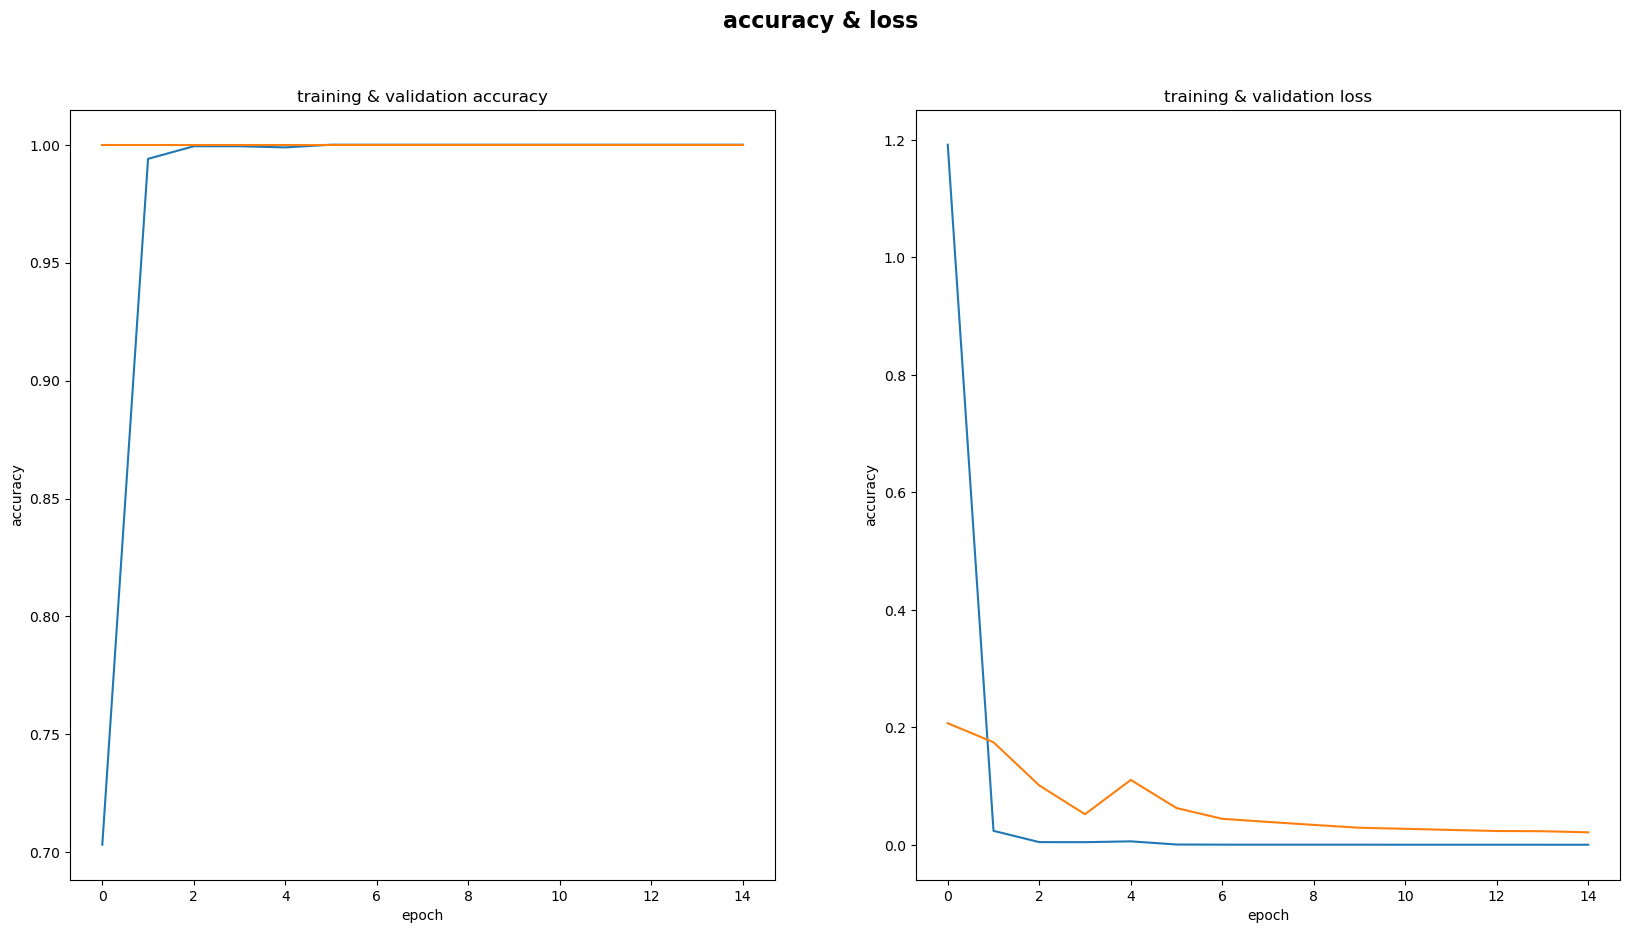

In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols=2,
                              nrows=1,
                              figsize=(20, 10))


# accuracy
ax0.plot(model.history.history["accuracy"])
ax0.plot(model.history.history["val_accuracy"])
ax0.set(title="training & validation accuracy",
        xlabel="epoch",
        ylabel="accuracy")

# loss
ax1.plot(model.history.history["loss"])
ax1.plot(model.history.history["val_loss"])
ax1.set(title="training & validation loss",
        xlabel="epoch",
        ylabel="accuracy")
fig.suptitle("accuracy & loss", fontsize=16, fontweight="bold")
plt.show()

In [ ]:
fig.savefig("accuracy & loss.png")

NameError: name 'fig' is not defined

In [ ]:
save_path = os.path.join("models/rps_model/1/")
tf.saved_model.save(model, save_path)

INFO:tensorflow:Assets written to: models/rps_model/1/assets


INFO:tensorflow:Assets written to: models/rps_model/1/assets


In [ ]:
model.save("model.h5")

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)

In [ ]:
# # Install tensorflowjs
# !pip install tensorflowjs
 
# # Convert model.h5 to model
# !tensorflowjs_converter --input_format=keras model.h5 tfjs_model

  Using cached tensorflowjs-4.1.0-py3-none-any.whl (84 kB)
  Using cached jax-0.4.1.tar.gz (1.2 MB)
  Preparing metadata (setup.py) ... done
  Using cached flax-0.6.3-py3-none-any.whl (197 kB)
  Using cached tensorflowjs-4.0.0-py3-none-any.whl (83 kB)
  Using cached tensorflowjs-3.21.0-py3-none-any.whl (81 kB)
  Using cached tensorflowjs-3.20.0-py3-none-any.whl (81 kB)
  Using cached tensorflowjs-3.19.0-py3-none-any.whl (78 kB)
  Using cached protobuf-3.20.0-py2.py3-none-any.whl (162 kB)
  Using cached tensorflowjs-3.18.0-py3-none-any.whl (77 kB)
  Using cached tensorflow_hub-0.12.0-py2.py3-none-any.whl (108 kB)
  Using cached packaging-20.9-py2.py3-none-any.whl (40 kB)
  Using cached tensorflowjs-3.17.0-py3-none-any.whl (77 kB)
  Using cached tensorflowjs-3.15.0-py3-none-any.whl (77 kB)
  Using cached tensorflowjs-3.14.0-py3-none-any.whl (77 kB)
  Using cached tensorflowjs-3.13.0-py3-none-any.whl (77 kB)
  Using cached tensorflowjs-3.12.0-py3-none-any.whl (77 kB)
  Using cached tensor

In [ ]:
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#   json_file.write(model_json)

# model.save_weights("model_weight.h5")
# print("save model to disk")

In [ ]:
# #save model
# import pickle
# with open("model_pkl", "wb") as files:
#   pickle.dump(model, files)

In [ ]:
# import joblib
# joblib.dump(model, "model_jlib")

In [ ]:
# import json
# import tensorflow as tf
# import numpy as np
# # Install tensorflowjs
# !pip install tensorflowjs
 
# # Convert model.h5 to model
# !tensorflowjs_converter --input_format=keras model_weight.h5 tfjs_model